# WeatherPy - Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import time
from time import sleep
import json
import pprint
import random
import matplotlib.cm as cm


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
weather_api_key = 'a16d178801fabf0c8dbf16e313d25503' #delete before pushing to github

base_url =  f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Define an empty list to fetch the weather data for each city
city_data = []

# Create counters
record_count = 1 
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

#set a time to 1 call/sec
        time.sleep(1)
 
    # Create endpoint URL with each space replaced with +
    city_url = base_url + "&q=" +  city.replace(" ", "+")

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # # Add 1 to the record count
    record_count += 1

    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url) 
        city_weather_json = city_weather.json()
        pprint.pprint(city_weather_json)

        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json['coord']['lat']
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json['sys']['country']
        city_date = city_weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat,        
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#     # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
             
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
{'base': 'stations',
 'clouds': {'all': 88},
 'cod': 200,
 'coord': {'lat': -54.2811, 'lon': -36.5092},
 'dt': 1684988176,
 'id': 3426466,
 'main': {'feels_like': 271.72,
          'grnd_level': 1003,
          'humidity': 59,
          'pressure': 1007,
          'sea_level': 1007,
          'temp': 274.26,
          'temp_max': 274.26,
          'temp_min': 274.26},
 'name': 'Grytviken',
 'sys': {'country': 'GS', 'sunrise': 1685010263, 'sunset': 1685038909},
 'timezone': -7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04n',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 131, 'gust': 2.76, 'speed': 2.23}}
Processing Record 2 of Set 1 | natal
{'base': 'stations',
 'clouds': {'all': 20},
 'cod': 200,
 'coord': {'lat': -5.795, 'lon': -35.2094},
 'dt': 1684988540,
 'id': 3394023,
 'main': {'feels_like': 298.35

In [4]:
city_data

[{'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max Temp': 274.26,
  'Humidity': 59,
  'Cloudiness': 88,
  'Wind Speed': 2.23,
  'Country': 'GS',
  'Date': 1684988176},
 {'City': 'natal',
  'Lat': -5.795,
  'Lng': -35.2094,
  'Max Temp': 297.51,
  'Humidity': 100,
  'Cloudiness': 20,
  'Wind Speed': 2.57,
  'Country': 'BR',
  'Date': 1684988540},
 {'City': 'tiksi',
  'Lat': 71.6872,
  'Lng': 128.8694,
  'Max Temp': 271.76,
  'Humidity': 75,
  'Cloudiness': 19,
  'Wind Speed': 2.03,
  'Country': 'RU',
  'Date': 1684988155},
 {'City': 'blackmans bay',
  'Lat': -43.0167,
  'Lng': 147.3167,
  'Max Temp': 287.22,
  'Humidity': 59,
  'Cloudiness': 45,
  'Wind Speed': 5.37,
  'Country': 'AU',
  'Date': 1684988159},
 {'City': 'isafjordur',
  'Lat': 66.0755,
  'Lng': -23.124,
  'Max Temp': 276.78,
  'Humidity': 77,
  'Cloudiness': 49,
  'Wind Speed': 10.44,
  'Country': 'IS',
  'Date': 1684988182},
 {'City': 'arraial do cabo',
  'Lat': -22.9661,
  'Lng': -42.0278,
  'Max Temp': 

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [6]:
#Conversions

# Create a new column for Max Temp F and fill with temos converted from Kelvin to C
city_data_df['Temp_C'] = city_data_df['Max Temp'] - 273.15

# Add column to df and convert wind speed to Km/hour from m/s
city_data_df['Wind KmH'] = city_data_df['Wind Speed'] * 3.6
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temp_C,Wind KmH
0,grytviken,-54.2811,-36.5092,274.26,59,88,2.23,GS,1684988176,1.11,8.028
1,natal,-5.7950,-35.2094,297.51,100,20,2.57,BR,1684988540,24.36,9.252
2,tiksi,71.6872,128.8694,271.76,75,19,2.03,RU,1684988155,-1.39,7.308
3,blackmans bay,-43.0167,147.3167,287.22,59,45,5.37,AU,1684988159,14.07,19.332
4,isafjordur,66.0755,-23.1240,276.78,77,49,10.44,IS,1684988182,3.63,37.584
...,...,...,...,...,...,...,...,...,...,...,...
544,canico,32.6333,-16.8500,290.77,83,20,0.51,PT,1684988681,17.62,1.836
545,fale old settlement,-9.3852,-171.2468,301.12,71,41,0.60,TK,1684988179,27.97,2.160
546,tuxpam de rodriguez cano,20.9500,-97.4000,298.40,83,21,3.17,MX,1684988489,25.25,11.412
547,zabol,32.2500,67.2500,295.01,21,0,2.11,AF,1684988681,21.86,7.596


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temp_C,Wind KmH
City_ID,,,,,,,,,,,
0,grytviken,-54.2811,-36.5092,274.26,59,88,2.23,GS,1684988176,1.11,8.028
1,natal,-5.7950,-35.2094,297.51,100,20,2.57,BR,1684988540,24.36,9.252
2,tiksi,71.6872,128.8694,271.76,75,19,2.03,RU,1684988155,-1.39,7.308
3,blackmans bay,-43.0167,147.3167,287.22,59,45,5.37,AU,1684988159,14.07,19.332
4,isafjordur,66.0755,-23.1240,276.78,77,49,10.44,IS,1684988182,3.63,37.584


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

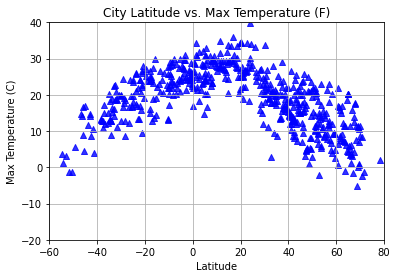

In [9]:
# Set up the plot
fig, ax  = plt.subplots()

# Create a scatter plot of lat vs. max 
ax.scatter(city_data_df["Lat"], city_data_df["Temp_C"], marker="^", alpha=0.8, color="blue")

# Set the title and axis labels
ax.set_title("City Latitude vs. Max Temperature (F)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (C)")

# Incorporate the other graph properties
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(-20, 40)

# Save the figure
fig.savefig("output_data/lat_temp.png")

# Show plot
plt.show()

#LONGITUDE VS. MAX TEMPERATURE


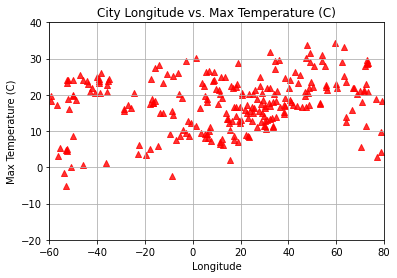

In [10]:
# Set up the plot
fig, ax  = plt.subplots()

# Create a scatter plot of lat vs. max temp
ax.scatter(city_data_df["Lng"], city_data_df["Temp_C"], marker="^", alpha=0.8, color="red")

# Set the title and axis labels
ax.set_title("City Longitude vs. Max Temperature (C)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Max Temperature (C)")

# Incorporate the other graph properties
plt.grid(True)

plt.xlim(-60, 80)
plt.ylim(-20, 40)

# Save the figure
fig.savefig("output_data/lng_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

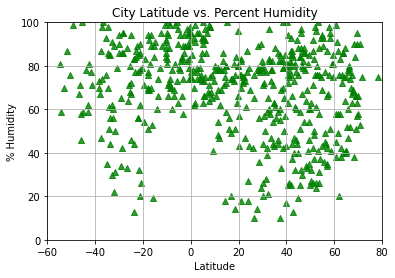

In [11]:
# Build the scatter plots for latitude vs. humidity

# Set up the plot
fig, ax  = plt.subplots()

# Create a scatter plot of lat vs. max temp
ax.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="^", alpha=0.8, color="green")

# Set the title and axis labels
ax.set_title("City Latitude vs. Percent Humidity")
ax.set_xlabel("Latitude")
ax.set_ylabel("% Humidity")

# Incorporate the other graph properties
plt.grid(True)

plt.xlim(-60, 80)
plt.ylim(0, 100)


# Save the figure
fig.savefig("output_data/lat_humid.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

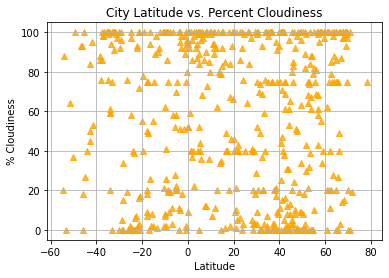

In [12]:
# Set up the plot
fig, ax  = plt.subplots()

# Create a scatter plot of lat vs. max temp
ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="^", alpha=0.8, color="orange")

# Set the title and axis labels
ax.set_title("City Latitude vs. Percent Cloudiness")
ax.set_xlabel("Latitude")
ax.set_ylabel("% Cloudiness")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
fig.savefig("output_data/lat_cloud.png")


#### Latitude vs. Wind Speed Plot

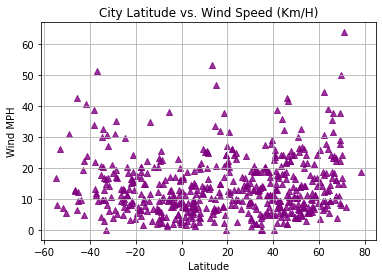

In [13]:
# Set up the plot
fig, ax  = plt.subplots()

# Create a scatter plot of lat vs. max temp
ax.scatter(city_data_df["Lat"], city_data_df["Wind KmH"], marker="^", alpha=0.8, color="purple")

# Set the title and axis labels
ax.set_title("City Latitude vs. Wind Speed (Km/H)")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind MPH")

# Incorporate the other graph properties
plt.grid(True)

# Save the figure
fig.savefig("output_data/lat_wind.png")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
import pandas as pd
import matplotlib.pyplot as plt

def plot_linear_regression(x, y):
    # Create a DataFrame from x and y
    df = pd.DataFrame({'x': x, 'y': y})
    
    # Calculate the slope and intercept of the linear regression line
    slope, intercept = np.polyfit(df['x'], df['y'], 1)


In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Remove uneeded columns
city_data_df = city_data_df.drop(['Max Temp', 'Wind Speed'], axis=1)

# Display sample data
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Temp_C,Wind KmH
City_ID,,,,,,,,,,,
2,tiksi,71.6872,128.8694,271.76,75,19,2.03,RU,1684988155,-1.39,7.308
4,isafjordur,66.0755,-23.1240,276.78,77,49,10.44,IS,1684988182,3.63,37.584
7,banda aceh,5.5577,95.3222,303.89,66,36,5.24,ID,1684988542,30.74,18.864
8,dergachi,51.2328,48.7659,295.14,42,82,7.31,RU,1684988543,21.99,26.316
10,keflavik,64.0049,-22.5624,279.39,75,75,10.80,IS,1684988274,6.24,38.880


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemi_df = city_data_df[city_data_df["Lat"] < 0]


# Display sample data
south_hemi_df.head()

,City,Lat,Lng,Humidity,Cloudiness,Country,Date,Temp_C,Wind KmH
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,59,88,GS,1684988176,1.11,8.028
1,natal,-5.7950,-35.2094,100,20,BR,1684988540,24.36,9.252
3,blackmans bay,-43.0167,147.3167,59,45,AU,1684988159,14.07,19.332
5,arraial do cabo,-22.9661,-42.0278,84,0,BR,1684988215,21.98,13.032
6,edinburgh of the seven seas,-37.0676,-12.3116,74,98,SH,1684988205,15.07,51.120


###  Temperature vs. Latitude Linear Regression Plot

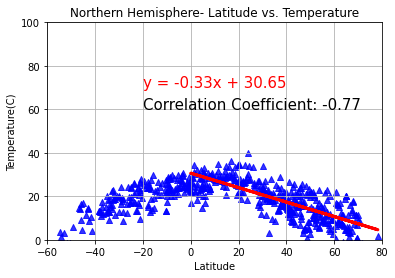

In [17]:
## NORTHERN HEMISPHERE- temp/lat

# Calculate the regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Temp_C']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


# Set up the scatter plot
fig, ax  = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Temp_C"], marker="^", alpha=0.8, color="blue")
plt.plot(x_values,regress_values,"r-", linewidth=3)


# Add the correlation coefficient to the plot
corr_coef = round(rvalue, 2)
plt.annotate(f"Correlation Coefficient: {corr_coef}", (-20, 60), fontsize=15, color="black")

# Add equation
plt.annotate(line_eq,(-20,70),fontsize=15,color="red")

ax.set_title("Northern Hemisphere- Latitude vs. Temperature")
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature(C)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
fig.savefig("output_data/north_lat_temp.png")

# Show plot
plt.show()

# Linear regression on Southern Hemisphere- TEMP/LAT


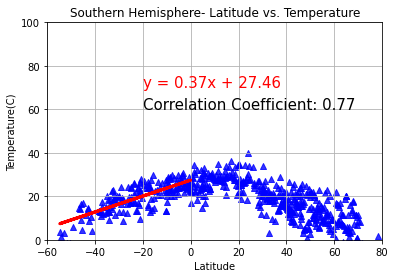

In [18]:

# Calculate the regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Temp_C']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set up the scatter plot
fig, ax  = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Temp_C"], marker="^", alpha=0.8, color="blue")
plt.plot(x_values,regress_values,"r-", linewidth=3)

# Add the correlation coefficient to the plot
corr_coef = round(rvalue, 2)
plt.annotate(f"Correlation Coefficient: {corr_coef}", (-20, 60), fontsize=15, color="black")
plt.annotate(line_eq,(-20,70),fontsize=15,color="red")

ax.set_title("Southern Hemisphere- Latitude vs. Temperature")
ax.set_xlabel("Latitude")
ax.set_ylabel("Temperature(C)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
fig.savefig("output_data/south_lat_temp.png")

# Show plot
plt.show()

### Humidity vs. Latitude Linear Regression Plot - Northern vs Southern Hemispheres

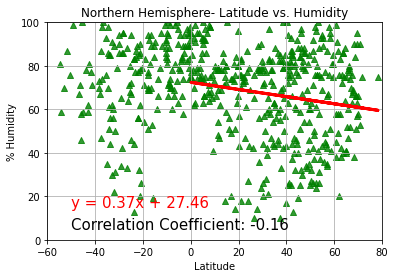

In [19]:
# Northern Hemisphere- LAT/HUMIDITY

# Calculate the regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Set up the scatter plot
fig, ax  = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="^", alpha=0.8, color="green")
plt.plot(x_values,regress_values,"r-", linewidth=3)

# Add the correlation coefficient to the plot
corr_coef = round(rvalue, 2)
plt.annotate(f"Correlation Coefficient: {corr_coef}", (-50, 5), fontsize=15, color="black")
plt.annotate(line_eq,(-50,15),fontsize=15,color="red")
# Set the x-axis limits to cover the full width of the plot
ax.set_xlim(x_values.min(), y_values.max())

ax.set_title("Northern Hemisphere- Latitude vs. Humidity")
ax.set_xlabel("Latitude")
ax.set_ylabel("% Humidity")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
fig.savefig("output_data/north_lat_humid.png")

# Show plot
plt.show()

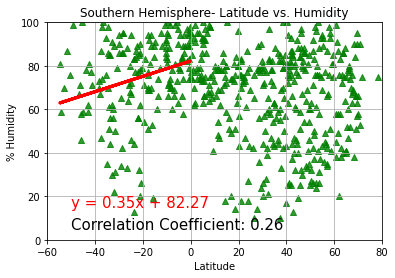

In [20]:
# Southern Hemisphere- LAT/HUMIDITY

# Calculate the regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set up the scatter plot
fig, ax  = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="^", alpha=0.8, color="green")
plt.plot(x_values,regress_values,"r-", linewidth=3)

# Add the correlation coefficient to the plot
corr_coef = round(rvalue, 2)
plt.annotate(f"Correlation Coefficient: {corr_coef}", (-50, 5), fontsize=15, color="black")
plt.annotate(line_eq,(-50, 15),fontsize=15,color="red")

ax.set_title("Southern Hemisphere- Latitude vs. Humidity")
ax.set_xlabel("Latitude")
ax.set_ylabel("% Humidity")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
fig.savefig("output_data/south_lat_humid.png")

# Show plot
plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

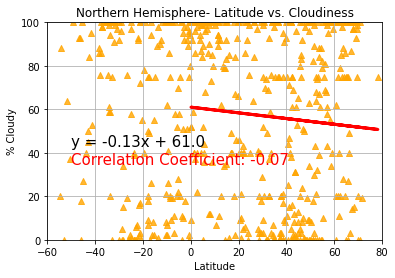

In [21]:
# Northern Hemisphere- LAT/CLOUD

# Calculate the regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set up the scatter plot
fig, ax  = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="^", alpha=0.8, color="orange")
plt.plot(x_values,regress_values,"r-", linewidth=3)

# Add the correlation coefficient to the plot
corr_coef = round(rvalue, 2)
plt.annotate(f"Correlation Coefficient: {corr_coef}", (-50, 35), fontsize=15, color="red")
plt.annotate(line_eq,(-50, 43),fontsize=15,color="black")

#title and labeling
ax.set_title("Northern Hemisphere- Latitude vs. Cloudiness")
ax.set_xlabel("Latitude")
ax.set_ylabel("% Cloudy")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
fig.savefig("output_data/north_lat_cloud.png")

# Show plot
plt.show()


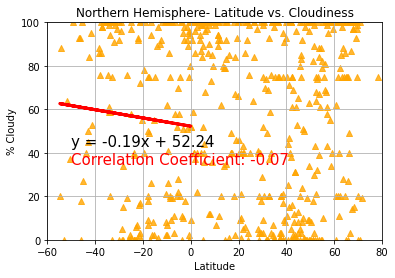

In [22]:
# Southern Hemisphere- LAT/CLOUD

# Calculate the regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set up the scatter plot
fig, ax  = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="^", alpha=0.8, color="orange")
plt.plot(x_values,regress_values,"r-", linewidth=3)

# Add the correlation coefficient to the plot
corr_coef = round(rvalue, 2)
plt.annotate(f"Correlation Coefficient: {corr_coef}", (-50, 35), fontsize=15, color="red")
plt.annotate(line_eq,(-50, 43),fontsize=15,color="black")

#Title and labeling
ax.set_title("Northern Hemisphere- Latitude vs. Cloudiness")
ax.set_xlabel("Latitude")
ax.set_ylabel("% Cloudy")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
fig.savefig("output_data/north_lat_cloud.png")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

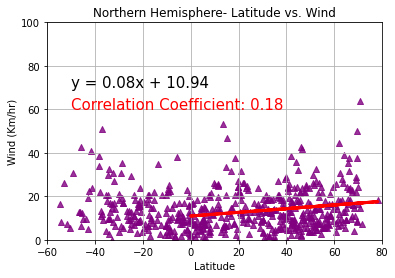

In [23]:
# Northern Hemisphere- LAT/WIND

# Calculate the regression
x_values = north_hemi_df['Lat']
y_values = north_hemi_df['Wind KmH']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set up the scatter plot
fig, ax  = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Wind KmH"], marker="^", alpha=0.8, color="purple")        
plt.plot(x_values,regress_values,"r-", linewidth=3)

# Add the correlation coefficient to the plot
corr_coef = round(rvalue, 2)
plt.annotate(f"Correlation Coefficient: {corr_coef}", (-50, 60), fontsize=15, color="red")
plt.annotate(line_eq,(-50, 70),fontsize=15,color="black")

#title and labels
ax.set_title("Northern Hemisphere- Latitude vs. Wind")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind (Km/hr)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
fig.savefig("output_data/north_lat_wind.png")

# Show plot
plt.show()

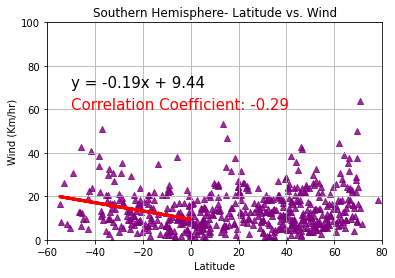

In [24]:
# Southern Hemisphere- LAT WIND

# Calculate the regression
x_values = south_hemi_df['Lat']
y_values = south_hemi_df['Wind KmH']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Set up the scatter plot
fig, ax  = plt.subplots()
ax.scatter(city_data_df["Lat"], city_data_df["Wind KmH"], marker="^", alpha=0.8, color="purple")
plt.plot(x_values,regress_values,"r-", linewidth=3)

# Add the correlation coefficient to the plot
corr_coef = round(rvalue, 2)
plt.annotate(f"Correlation Coefficient: {corr_coef}", (-50, 60), fontsize=15, color="red")
plt.annotate(line_eq,(-50, 70),fontsize=15,color="black")

#Title and labels
ax.set_title("Southern Hemisphere- Latitude vs. Wind")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind (Km/hr)")
plt.grid(True)
plt.xlim(-60, 80)
plt.ylim(0, 100)

# Save the figure
fig.savefig("output_data/south_lat_wind.png")

# Show plot
plt.show()